# 2. Introduction à Pandas

<img align="center" src="https://habrastorage.org/files/10c/15f/f3d/10c15ff3dcb14abdbabdac53fed6d825.jpg"/>
<br>

**[Pandas](http://pandas.pydata.org)** est une librairire Python permettant l'analyse de données, elle est fréquemment utilisée par les data scientist pour lire et manipuler des données dans des formats tabulaires tel que `.csv`, `.tsv`, or `.xlsx`. Avec l'aide de `Matplotlib` et `Seaborn`, Pandas fournit des méthodes d'epxloration visuelles des données tabulaires.

## 2.1 DataFrame

Les structures de données principale de Pandas sont les **Series** et les **DataFrame**. La première est un tableau à une dimension contenant des données d'un type précis. La deuxième est une structure à deux dimensions, i.e. : un tableau à deux dimensions (ou encore une matrice), dont chaque colonne contient des données d'un type précis. Dans une `DataFrame` les lignes correspondent à des individus (objets, observations ...) et les colonnes à des attributs (features).

Nous commencons par les imports nécessaire pour que Pandas soit disponible dans notre environnement d'exécution :

In [18]:
import numpy as np
import pandas as pd
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

Puis nous créons une DataFrame depuis un dictionnaire :

In [19]:
cars = {
    'make': ['Ford', 'Honda', 'Toyota', 'Tesla'],
    'model': ['Taurus', 'Accord', 'Camry', 'Model S'],
    'MSRP': [27595, 23570, 23495, 68000]
}
df = pd.DataFrame(cars)   # creating DataFrame from dictionary
df                     # display the table

,make,model,MSRP
0,Ford,Taurus,27595
1,Honda,Accord,23570
2,Toyota,Camry,23495
3,Tesla,Model S,68000


In [20]:
print(df.index)       # print the row indices
print(df.columns)     # print the column indices

RangeIndex(start=0, stop=4, step=1)
Index(['make', 'model', 'MSRP'], dtype='object')


In [21]:
df['year'] = 2018    # add column with same value
# add a column with a different value for each row:
df['dealership'] = ['Courtesy Ford','Capital Honda','Spartan Toyota',None]
df

,make,model,MSRP,year,dealership
0,Ford,Taurus,27595,2018,Courtesy Ford
1,Honda,Accord,23570,2018,Capital Honda
2,Toyota,Camry,23495,2018,Spartan Toyota
3,Tesla,Model S,68000,2018,None


Les éléments d'une DataFrame peuvent être accéder de différentes manières :

In [22]:
# accessing an entire column will return a Series object

print(type(df['make']))
print(df['make'])    # returns the make column

<class 'pandas.core.series.Series'>
0      Ford
1     Honda
2    Toyota
3     Tesla
Name: make, dtype: object


In [23]:
# accessing an entire row will return a Series object

print(type(df.iloc[2]))
print(df.iloc[2])       # returns the 3rd row of DataFrame

<class 'pandas.core.series.Series'>
make                  Toyota
model                  Camry
MSRP                   23495
year                    2018
dealership    Spartan Toyota
Name: 2, dtype: object


In [24]:
# accessing a specific element of the DataFrame

print(df.iloc[1,2])    # retrieving second row, third column
print(df.loc[1,'MSRP'])    # retrieving second row, column named 'MSRP'
print(df.loc[1]['MSRP'])    # retrieving second row, column named 'MSRP'

23570
23570
23570


In [27]:
df

,make,model,MSRP,year,dealership
0,Ford,Taurus,27595,2018,Courtesy Ford
1,Honda,Accord,23570,2018,Capital Honda
2,Toyota,Camry,23495,2018,Spartan Toyota
3,Tesla,Model S,68000,2018,None


In [42]:
# accessing a slice of the DataFrame

df.iloc[1:3,1:3]

,model,MSRP
1,Accord,23570
2,Camry,23495


Les attributs shape et size permettent de connaitre le nombre de lignes et colonnes ainsi que le nombre d'élements :

In [44]:
print('df.shape =', df.shape)    # shape returns a tuple (number of rows, number of columns)
print('df.size =', df.size)

df.shape = (4, 5)
df.size = 20


In [46]:
df.isna()
df.shape

(4, 5)

## 2.2 Filtrage d'une DataFrame

La sélection d'une ou plusieurs lignes peut se faire en appliquant un filtre booléen :

In [47]:
df[df.MSRP > 25000]

,make,model,MSRP,year,dealership
0,Ford,Taurus,27595,2018,Courtesy Ford
3,Tesla,Model S,68000,2018,None


Le filtre est simplement constitué d'une Series contenant une valeur booléenne pour chaque ligne de notre DataFrame qui sera ensuite appliqué comme masque de sélection sur la DataFrame:

In [49]:
df.MSRP > 25000

0     True
1    False
2    False
3     True
Name: MSRP, dtype: bool

Il existe plusieurs méthodes utiles permettant de filtrer les DataFrames :

In [51]:
df[df.dealership.isna()]    # retrieving rows with a null value on the dealership column

,make,model,MSRP,year,dealership
3,Tesla,Model S,68000,2018,None


In [53]:
df[df.MSRP.between(23000, 24000)]    # retrieving rows with MSRP between 23k and 24k

,make,model,MSRP,year,dealership
1,Honda,Accord,23570,2018,Capital Honda
2,Toyota,Camry,23495,2018,Spartan Toyota


Les conditions dans un filtre peuvent être combinées avec les opérateurs `&` (ET booléen) et `|` (ou booléen) :

In [58]:
# retrieving rows with MSRP < 30k and the model name contains an o
df[
    (df['MSRP'] < 30000) & df.model.str.contains('o')
]

,make,model,MSRP,year,dealership
1,Honda,Accord,23570,2018,Capital Honda


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   make        4 non-null      object
 1   model       4 non-null      object
 2   MSRP        4 non-null      int64 
 3   year        4 non-null      int64 
 4   dealership  3 non-null      object
dtypes: int64(2), object(3)
memory usage: 288.0+ bytes


## 2.3 Opérations arithmétiques

Pour illustrer ces opérations nous allons créer une DataFrame contenant des données numériques synthétiques à l'aide de numpy (numerical python):

In [65]:
npdata = np.random.randn(5,3)  # create a 5 by 3 random matrix
columnNames = ['x1','x2','x3']
data = pd.DataFrame(npdata, columns=columnNames)
data

,x1,x2,x3
0,0.856228,-0.136542,1.699346
1,1.620681,2.486276,1.947028
2,1.027891,1.842334,0.690448
3,-0.613216,1.479287,-0.578857
4,-2.058770,1.466863,0.486552


In [66]:
print(data)

print('Data transpose operation:')
print(data.T)    # transpose operation

print('Addition:')
print(data + 4)    # addition operation

print('Multiplication:')
print(data * 10)   # multiplication operation

         x1        x2        x3
0  0.856228 -0.136542  1.699346
1  1.620681  2.486276  1.947028
2  1.027891  1.842334  0.690448
3 -0.613216  1.479287 -0.578857
4 -2.058770  1.466863  0.486552
Data transpose operation:
           0         1         2         3         4
x1  0.856228  1.620681  1.027891 -0.613216 -2.058770
x2 -0.136542  2.486276  1.842334  1.479287  1.466863
x3  1.699346  1.947028  0.690448 -0.578857  0.486552
Addition:
         x1        x2        x3
0  4.856228  3.863458  5.699346
1  5.620681  6.486276  5.947028
2  5.027891  5.842334  4.690448
3  3.386784  5.479287  3.421143
4  1.941230  5.466863  4.486552
Multiplication:
          x1         x2         x3
0   8.562281  -1.365423  16.993462
1  16.206812  24.862755  19.470276
2  10.278905  18.423338   6.904478
3  -6.132160  14.792866  -5.788570
4 -20.587700  14.668629   4.865518


In [67]:
print('data =')
print(data)

columnNames = ['x1','x2','x3']
data2 = pd.DataFrame(np.random.randn(5,3), columns=columnNames)
print('\ndata2 =')
print(data2)

print('\ndata + data2 = ')
print(data.add(data2))

print('\ndata * data2 = ')
print(data.mul(data2))

data =
         x1        x2        x3
0  0.856228 -0.136542  1.699346
1  1.620681  2.486276  1.947028
2  1.027891  1.842334  0.690448
3 -0.613216  1.479287 -0.578857
4 -2.058770  1.466863  0.486552

data2 =
         x1        x2        x3
0 -0.539058  2.367871 -0.658671
1 -2.426597 -1.915047  1.719731
2  0.360128  1.818875 -1.708804
3 -0.015031 -1.725673 -1.174935
4 -0.547020 -1.853660 -1.275649

data + data2 = 
         x1        x2        x3
0  0.317170  2.231329  1.040675
1 -0.805915  0.571229  3.666759
2  1.388018  3.661209 -1.018356
3 -0.628247 -0.246387 -1.753792
4 -2.605790 -0.386797 -0.789098

data * data2 = 
         x1        x2        x3
0 -0.461556 -0.323315 -1.119310
1 -3.932739 -4.761333  3.348364
2  0.370172  3.350975 -1.179840
3  0.009218 -2.552765  0.680119
4  1.126188 -2.719065 -0.620670


In [71]:
print(data.abs())    # get the absolute value for each element

print('\nMaximum value per column:')
print(data.max())    # get maximum value for each column

print('\nMinimum value per row:')
print(data.min(axis=1))    # get minimum value for each row

print('\nSum of values per column:')
print(data.sum())    # get sum of values for each column

print('\nAverage value per row:')
print(data.mean(axis=1))    # get average value for each row

print('\nCalculate max - min per column')
f = lambda x: x.max() - x.min()
print(data.apply(f))

print('\nCalculate max - min per row')
f = lambda x: x.max() - x.min()
print(data.apply(f, axis=1))

         x1        x2        x3
0  0.856228  0.136542  1.699346
1  1.620681  2.486276  1.947028
2  1.027891  1.842334  0.690448
3  0.613216  1.479287  0.578857
4  2.058770  1.466863  0.486552

Maximum value per column:
x1    1.620681
x2    2.486276
x3    1.947028
dtype: float64

Minimum value per row:
0   -0.136542
1    1.620681
2    0.690448
3   -0.613216
4   -2.058770
dtype: float64

Sum of values per column:
x1    0.832814
x2    7.138217
x3    4.244516
dtype: float64

Average value per row:
0    0.806344
1    2.017995
2    1.186891
3    0.095738
4   -0.035118
dtype: float64

Calculate max - min per column
x1    3.679451
x2    2.622818
x3    2.525885
dtype: float64

Calculate max - min per row
0    1.835889
1    0.865594
2    1.151886
3    2.092503
4    3.525633
dtype: float64


In [78]:
#f = lambda x: x.max() - x.min()
def max_minus_min(x):
    print(type(x))
    print(x)
    print(x.max(), x.min())
    return x.max() - x.min()
data.apply(max_minus_min)

<class 'pandas.core.series.Series'>
0    0.856228
1    1.620681
2    1.027891
3   -0.613216
4   -2.058770
Name: x1, dtype: float64
1.6206811962409275 -2.0587700463835725
<class 'pandas.core.series.Series'>
0   -0.136542
1    2.486276
2    1.842334
3    1.479287
4    1.466863
Name: x2, dtype: float64
2.486275516672605 -0.13654229438018392
<class 'pandas.core.series.Series'>
0    1.699346
1    1.947028
2    0.690448
3   -0.578857
4    0.486552
Name: x3, dtype: float64
1.9470275970790056 -0.5788569810462737


x1    3.679451
x2    2.622818
x3    2.525885
dtype: float64

In [81]:
# add a max minus min column
data['max_minus_min'] = data.apply(
    lambda x: x.max() - x.min(),
    axis=1
)
data

,x1,x2,x3,max_minus_min
0,0.856228,-0.136542,1.699346,2.108973
1,1.620681,2.486276,1.947028,0.865594
2,1.027891,1.842334,0.690448,1.151886
3,-0.613216,1.479287,-0.578857,3.318935
4,-2.058770,1.466863,0.486552,7.643173


## 2.4 Exercice

Nous reprennons le fichier `CO2_Emissions_Canada.csv`. Pour lire un fichier CSV nous pouvons utiliser la méthode `read_csv` de Pandas (la méthode `head()` affiche les 5 première lignes de notre DataFrame).

La description accompagnant ce dataset est la suivante :

**Model**
* 4WD/4X4 = Four-wheel drive
* AWD = All-wheel drive
* FFV = Flexible-fuel vehicle
* SWB = Short wheelbase
* LWB = Long wheelbase
* EWB = Extended wheelbase

**Transmission**
* A = Automatic
* AM = Automated manual
* AS = Automatic with select shift
* AV = Continuously variable
* M = Manual
* 3 - 10 = Number of gears

**Fuel type**
* X = Regular gasoline
* Z = Premium gasoline
* D = Diesel
* E = Ethanol (E85)
* N = Natural gas

**Fuel Consumption**

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

**CO2 Emissions**

The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

Chargez le dataset contenu dans le fichier CO2 Emissions_Canada.csv dans une DataFrame avec la fonction [`pandas.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) et affichez ses premières lignes :

In [62]:
df2 = pd.read_csv('/data/CO2_Emissions_Canada.csv')
df2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Affichez les dimensions de ce dataset, le nom des features et leurs types à l'aide des attributs `shape`, `columns` et de la méthode `info()` :

In [63]:
print(df2.shape, df2.columns)
df2.info()

(7385, 12) Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel

Utilisez la méthode `describe` pour afficher un ensemble de statistiques pour chaque feature numériques (`int64` et `float64`) : nombre de valeurs non manquantes, moyenne, variance, médiane, min, max, quartiles.

In [64]:
df2.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Répondez aux questions suivantes :
* Combien de ligne le fichier contient-il ?
* Quel est le CO2 maximum émis par km par un véhicule ?
* Combien de véhicules émettent une tel quantité de CO2 par km ?
* Combien de CO2 les véhicules émettent en moyenne ?
* Quels sont les 5 véhicules qui émettent le moins de CO2 par km (vous pouvez utiliser la méthode [`sort_values`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)) ?
* Y-a-t'il des doublons dans ce dataset et si oui, combien (vous pouvez utiliser la méthode [`duplicated`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)) ?
* Quelles sont les fabricants qui produisent les véhicules les plus polluants en moyenne (vous pouvez utiliser la méthode [`groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) - voir aussi [l'introduction tutorial de Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html#aggregating-statistics-grouped-by-category)) ?

## 2.7 Visualisation

Nous pouvons visualiser les données en utilisant directement les méthodes disponibles dans Pandas (qui utilisent la librairie matplotlib) :

In [85]:
df2

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


Text(0, 0.5, 'my y-label')

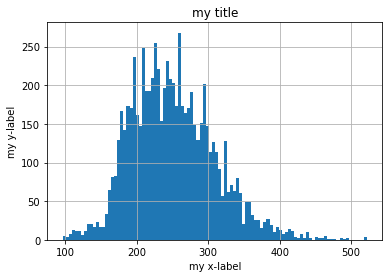

In [103]:
ax = df2['CO2 Emissions(g/km)'].hist(bins=100)    # distribution of CO2 emissions
ax.set_title("my title")
ax.set_xlabel("my x-label")
ax.set_ylabel("my y-label")

Text(0, 0.5, 'nb Make')

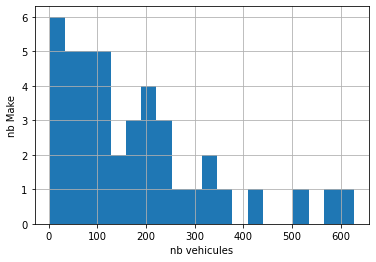

In [110]:
ax = df2['Make'].value_counts().hist(bins=20)    # number of vehicules per make
ax.set_xlabel("nb vehicules")
ax.set_ylabel("nb Make")

In [105]:
df2['Make'].value_counts()

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

Ou la librairire Plotly (il est peut-être nécessaire de l'installer avant) :

In [111]:
!pip install plotly

In [122]:
import plotly.express as px
fig = px.histogram(df2, x="CO2 Emissions(g/km)", nbins=10, color='Make')
fig.show()

In [124]:
fig = px.histogram(df2, x="Make").update_xaxes(categoryorder="total descending")
fig.show()

In [126]:
fig = px.box(df2, x="Make", y="CO2 Emissions(g/km)")
fig.show()

## 2.8 Excercice

* Afficher un box plot des émissions de CO2 par km par type de véhicule
* Afficher un [scatter plot](https://plotly.com/python/line-and-scatter/) des émissions de CO2 par km en fonction de la consommation de carburant
* Quel est le facteur qui explique les différentes modalités de cette relation ?